# Time Series Week 3 - Assignment

## 1. Decomposing Stock Time Series Data

### 1.1. Using yfinance to Collect 3 Years of Data
**Task:** Collect stock price data for the past 3 years using the yfinance library.


In [3]:
pip install yfinance


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Choose a stock symbol (e.g., GOOGL, Tesla or any stock of your choice not AAPL).
# Use the yfinance library to download the historical stock data for the past 3 years.

# Retrieve daily data including columns for Date, Open, High, Low, Close, and Volume.
# Google Mount
from google.colab import drive
drive.mount('/content/drive')


import pandas as pd
import yfinance as yf

# Specify a start and end date
start_date = '2020-01-01'
end_date = '2024-04-24'

# Import data for Apple stock
GOOGL = yf.download('GOOGL', start=start_date, end=end_date)

# Output the result
GOOGL.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,67.420502,68.433998,67.324501,68.433998,68.264961,27278000
2020-01-03,67.400002,68.687500,67.365997,68.075996,67.907845,23408000
2020-01-06,67.581497,69.916000,67.550003,69.890503,69.717865,46768000
2020-01-07,70.023003,70.175003,69.578003,69.755501,69.583206,34330000
2020-01-08,69.740997,70.592499,69.631500,70.251999,70.078476,35314000


### 1.2. Visualize Raw Stock Time Series Data
**Task:** Create a line plot to visualize the raw stock time series data.

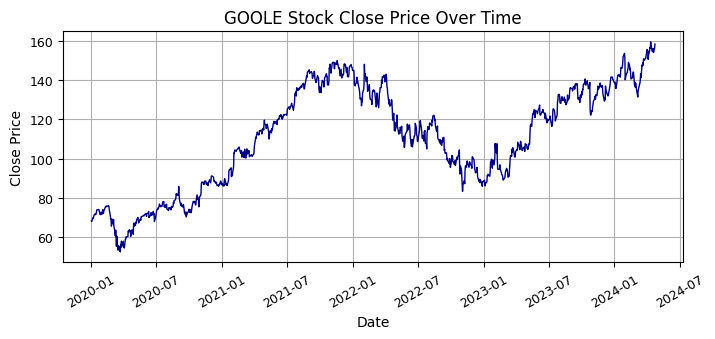

In [6]:
# Load the stock data and visualize the one of the features(can be either Open, High, Low or Close) price over time.
# Customize the plot by adding titles, labels, and date formatting.
GOOGL.reset_index(inplace=True)
GOOGL=GOOGL[['Date','Close']]


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))

plt.plot(GOOGL['Date'], GOOGL['Close'], color='navy', linewidth=1)

plt.title('GOOLE Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.xticks(rotation=30,fontsize=9)
plt.yticks(fontsize=9)

plt.grid(True)

### 1.3. Decompose the Raw Time Series Data
**Task:** Decompose the time series data into trend, seasonal, and residual components using statsmodels.

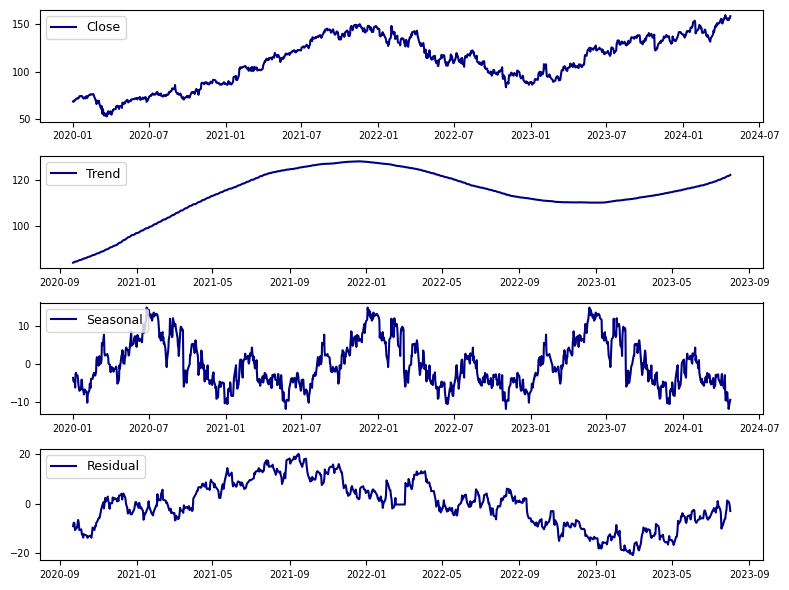

In [7]:
# Perform decomposition on the Close price to extract the trend, seasonal, and residual components.
# Plot the decomposed components in separate subplots.
from statsmodels.tsa.seasonal import seasonal_decompose

# One more preprocessing below because date_time should go to index
GOOGL.set_index('Date',drop=True,inplace=True)
result = seasonal_decompose(GOOGL, model='additive', period=365)

# Visualise results
plt.figure(figsize=(8, 6))

# Plot original data
plt.subplot(4, 1, 1)
plt.plot(GOOGL, label='Close', color='navy')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# Trend plots
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend', color='navy')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# Seasonality plots
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal', color='navy')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# Residuals Plot
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual', color='navy')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.tight_layout()
plt.show()



## 2. Trend Analysis Using Data

### 2.1. Exploratory Data Analysis (EDA)
**Task:** Perform EDA to understand the distribution and trends in the stock data.

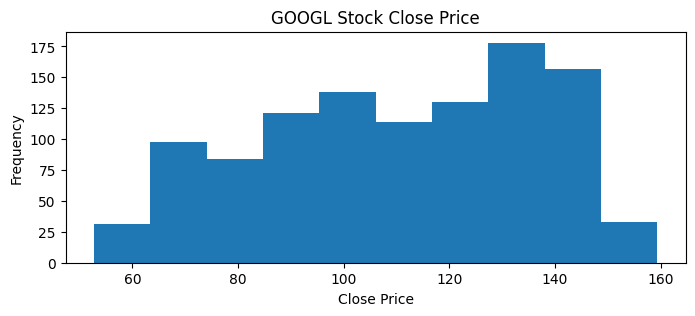

In [8]:
# Plot histograms for the Close price
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
plt.title('GOOGL Stock Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.hist(GOOGL)
plt.show()

In [9]:
# Compute descriptive statistics (mean, median, standard deviation)
mean = GOOGL.mean().item()
median = GOOGL.median().item()
std_dev = GOOGL.std().item()

print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")

Mean: 110.60
Median: 113.83
Standard Deviation: 26.17


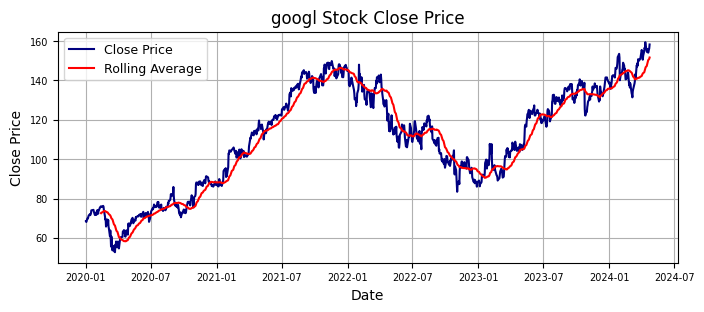

In [10]:
# Plot a rolling average of the Close price to highlight long-term trends
roll_avg = GOOGL.rolling(window=30).mean()
plt.figure(figsize=(8, 3))
plt.title('googl Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(GOOGL, label='Close Price', color='navy')
plt.plot(roll_avg, label='Rolling Average', color='red')
plt.legend(loc='upper left',fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.grid(True)
plt.show()

### 2.2. Predict Using a Linear Model
**Task:** Build and evaluate a linear regression model to predict future stock prices.

In [11]:
# Prepare the data

# Train model using whole dataset not spliting dataset

# Build the linear regression model

import statsmodels.api as sm
from scipy.stats import t
import numpy as np

GOOGL.reset_index(inplace=True)
GOOGL['time']= range(1, len(GOOGL)+1)
y = GOOGL['Close']  # Response variable: Close prices
time = GOOGL['time']  # Predictor variable: Time
X = sm.add_constant(time)

ols_fit = sm.OLS(y, X).fit()


<ipython-input-11-4a54c7090193>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GOOGL['time']= range(1, len(GOOGL)+1)


In [12]:
# Fit the model to the Close price and predict future prices
b0 = ols_fit.params.const
b1 = ols_fit.params.time

print(f"The value of b0 (intercept) is {b0}")
print(f"The value of b1 (slope) is {b1}")

The value of b0 (intercept) is 80.39743001344229
The value of b1 (slope) is 0.055665266805167604


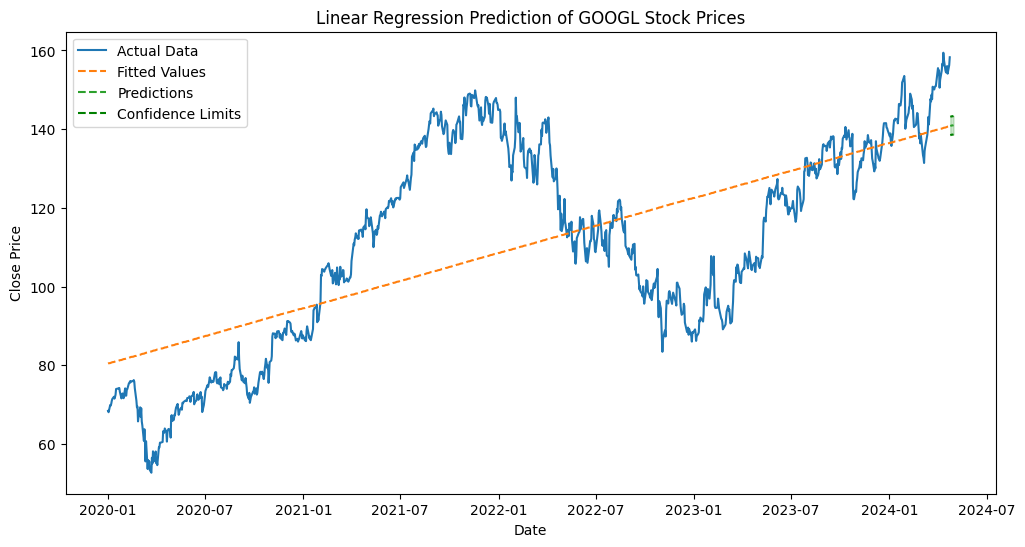

In [23]:
# Predict future stock prices
future = [1, 2, 3, 4, 5]  # Future time steps to predict
n = len(GOOGL)  # Number of observations

# Calculate the inverse of X'X
X_tX_inv = np.linalg.inv(X.T.dot(X))

# Calculate the variance of the residuals
s2 = np.sum(np.square(y - b0 - b1 * time)) / (n - 2)

# Significance Level => Confidence intervals 95%
alpha = 0.05
t_val = t.ppf(1 - alpha / 2, df=n - 2)

predict_vals = []
upper_limit = []
lower_limit = []

for l in future:
    future_time = n + l  # Future time value
    predict_val = b0 + b1 * future_time

    # Variance factor for confidence intervals
    x = np.array([[1], [future_time]])
    variance_factor = np.sqrt(x.T.dot(X_tX_inv).dot(x))
    limit = t_val * np.sqrt(s2) * variance_factor[0][0]

    predict_vals.append(predict_val)
    upper_limit.append(predict_val + limit)
    lower_limit.append(predict_val - limit)

# Create a DataFrame for predictions
last_date = GOOGL['Date'].iloc[-1]
start_date = last_date + pd.Timedelta(days=1)
future_dates = pd.date_range(start=start_date, periods=len(future), freq='B')  # 'B' for business days

pred_data = {
    'pred': predict_vals,
    'ul': upper_limit,
    'll': lower_limit
}
pred_df = pd.DataFrame(pred_data, index=future_dates)

# Fitted values for existing data
fitted_val = b0 + b1 * time

# Plot the results
fig = plt.figure(figsize=(12, 6))
fig.set_facecolor('white')

# Plot actual data
plt.plot(GOOGL['Date'], GOOGL['Close'], label='Actual Data', marker='', markerfacecolor='none')

# Plot fitted values
plt.plot(GOOGL['Date'], fitted_val, label='Fitted Values', linestyle='--')

# Plot predictions
plt.plot(pred_df.index, pred_df['pred'], label='Predictions', linestyle='--')

# Plot confidence intervals
plt.plot(pred_df.index, pred_df['ll'], color='green', linestyle='--', label='Confidence Limits')
plt.plot(pred_df.index, pred_df['ul'], color='green', linestyle='--')

# Fill between confidence intervals
plt.fill_between(pred_df.index, pred_df['ll'], pred_df['ul'], color='green', alpha=0.2)

plt.legend(loc='upper left')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.title('Linear Regression Prediction of GOOGL Stock Prices')
plt.show()

### 2.3. Predict Using a Quadratic Model
**Task:** Build and evaluate a quadratic regression model to predict future stock prices.

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Extend the linear model to quadratic by including a Time^2 term
# Fit the quadratic model
GOOGL['time_squared'] = GOOGL['time'] ** 2  # Create Time^2 variable
X_quad = GOOGL[['time', 'time_squared']]
X_quad = sm.add_constant(X_quad)

# Train model using whole dataset not spliting dataset
quad_fit = sm.OLS(y, X_quad).fit()
b0_quad = quad_fit.params.const
b1_quad = quad_fit.params.time
b2_quad = quad_fit.params.time_squared

print("Quadratic Model Coefficients:")
print(f"Intercept (b0): {b0_quad}")
print(f"Slope (b1): {b1_quad}")
print(f"Quadratic Term (b2): {b2_quad}\n")

# Number of observations
n = len(GOOGL)

# Significance Level => Confidence intervals 95%
alpha = 0.05
t_val_linear = t.ppf(1 - alpha / 2, df=n - 2)
t_val_quad = t.ppf(1 - alpha / 2, df=n - 3)
# Build the quadratic model


Quadratic Model Coefficients:
Intercept (b0): 64.97358722368914
Slope (b1): 0.14087986785360831
Quadratic Term (b2): -7.85388028096213e-05



<ipython-input-25-6d9a825e2739>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GOOGL['time_squared'] = GOOGL['time'] ** 2  # Create Time^2 variable


In [29]:
# Fit the model to the Close price and predict future prices

# Calculate the inverse of X'X for quadratic model
X_tX_inv_quad = np.linalg.inv(X_quad.T.dot(X_quad))

# Variance of residuals for quadratic model
s2_quad = np.sum(np.square(y - b0_quad - b1_quad * GOOGL['time'] - b2_quad * GOOGL['time_squared'])) / (n - 3)
# Quadratic Model Predictions
predict_vals_quad = []
upper_limit_quad = []
lower_limit_quad = []

for l in future:
    future_time = n + l
    future_time_squared = future_time ** 2
    predict_val_quad = b0_quad + b1_quad * future_time + b2_quad * future_time_squared

    # Variance factor for confidence intervals
    x_quad = np.array([1, future_time, future_time_squared])
    variance_factor_quad = np.sqrt(x_quad.T.dot(X_tX_inv_quad).dot(x_quad))
    limit_quad = t_val_quad * np.sqrt(s2_quad) * variance_factor_quad

    predict_vals_quad.append(predict_val_quad)
    upper_limit_quad.append(predict_val_quad + limit_quad)
    lower_limit_quad.append(predict_val_quad - limit_quad)


# Quadratic Model Predictions DataFrame
pred_data_quad = {
    'pred': predict_vals_quad,
    'ul': upper_limit_quad,
    'll': lower_limit_quad
}
pred_df_quad = pd.DataFrame(pred_data_quad, index=future_dates)

fitted_val_quad = b0_quad + b1_quad * GOOGL['time'] + b2_quad * GOOGL['time_squared']
vals_quad = pd.concat([fitted_val_quad, pred_df_quad['pred']])



### 2.4. Model Estimation Using Error Metrics

In [33]:
# Use mean_absolute_error and mean_squared_error to evaluate both models.
#linear_fit = sm.OLS(y, X_linear).fit()


# Evaluate models using MAE and MSE
mae_linear = mean_absolute_error(y, fitted_val)
mse_linear = mean_squared_error(y, fitted_val)


mae_quadratic = mean_absolute_error(y, fitted_val_quad)
mse_quadratic = mean_squared_error(y, fitted_val_quad)

# 결과 출력
print(f"MAE Linear: {mae_linear:.2f}")
print(f"MSE Linear: {mse_linear:.2f}")
print("-" * 50)
print(f"MAE Quadratic: {mae_quadratic:.2f}")
print(f"MSE Quadratic: {mse_quadratic:.2f}")

MAE Linear: 15.81
MSE Linear: 380.73
--------------------------------------------------
MAE Quadratic: 15.08
MSE Quadratic: 333.41
